In [3]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

# from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

# Tight-binding model of 1d chain

## Introduction
This notebook is intended to give a very basic example to the band structure calculation, with the model of one-dimensional atom chains.


One can write the Hamiltonian by projecting the intercell and intracell hoppings to lattice A and B: 
$$H_1^{ab}=\langle \psi_A | H_1 | \psi_B \rangle = \gamma _1  $$
$$H_2^{ab}=\langle \psi_A | H_2 | \psi_B \rangle = \gamma_2 $$
$$H = H_1 + H_2$$
Under such projection, the Hamiltonian is thus converted into a form of 2x2 matrices.

With the Bloch functions, the intercell hopping is then:
$$H_2^{ab}=\langle \psi_A | H_2 | \exp(-ik) \psi_B \rangle =\gamma_2 \exp(-ik)$$
considering the sublattice potentials $\varepsilon_1$ and $\varepsilon_1$ on A and B, we write the Hamiltonian matrix in terms of wavevector k:
$$H_{00}=\left(\begin{array}{cc}
\varepsilon_1 & \gamma_1\\
\gamma_1 & \varepsilon_2
\end{array}\right)$$
$$H_{01}=\left(\begin{array}{cc}
0 & \gamma_2 \exp(ik)\\
0 & 0
\end{array}\right)$$
$$H_{10}=\left(\begin{array}{cc}
0 & 0\\
\gamma_2\exp(-ik) & 0
\end{array}\right)$$

The whole Hamiltonian matrix writes:
$$H(k)=H_{00}+H_{01}+H_{10}=\left(\begin{array}{cc}
\varepsilon_1 & \gamma_1+\gamma_2 \exp(ik)\\
\gamma_1+\gamma_2\exp(-ik) & \varepsilon_2
\end{array}\right)$$

In order to calculate the bands, one should diagonalize the Hamiltonian $H(k)$ for each point of $k$. That's to solve the quadratic equation:
$$ (\lambda-\varepsilon_1)(\lambda-\varepsilon_2) = (\gamma_1 + \gamma_2\cos(k))^2 + (\gamma_2\sin(k))^2$$
<!---and the answer is :
#$$\lambda=\pm \sqrt{(\gamma_1 + \gamma_2\cos(k))^2 + (\gamma_2\sin(k))^2}$$--->

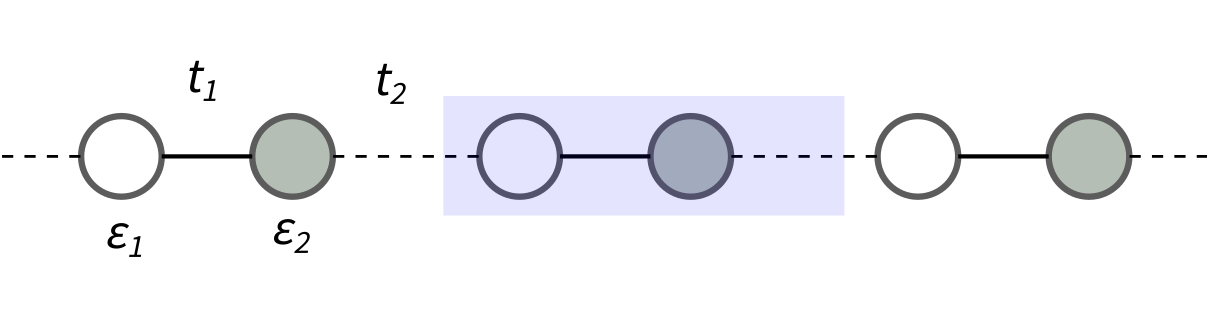

In [6]:
def interactive_1dband(t1,t2,e1,e2):
    nk=40
    k=np.linspace(-1.0*np.pi,1.0*np.pi,nk)
    c=-(t1+t2*np.cos(k))**2-(t2*np.sin(k))**2-e1*e2
    b=-(e1+e2)
    a=1
    
    x1=(-b+np.sqrt(b**2-4*a*c))/(2*a)
    x2=(-b-np.sqrt(b**2-4*a*c))/(2*a)

    plt.scatter(k,x1)
    plt.scatter(k,x2)
    #fix nk

In [7]:
interact(interactive_1dband,t1=(0.5,1.5),t2=(0.5,1.5),e1=(0.0,1.5),e2=(0.0,1.5))

interactive(children=(FloatSlider(value=1.0, description='t1', max=1.5, min=0.5), FloatSlider(value=1.0, descr…

<function __main__.interactive_1dband(t1, t2, e1, e2)>

We show the Hamiltonian in finite 1D chain

# Questions

- At what parameters will the system be gapless? Show the condition in terms of $\gamma_1, \gamma_2, \varepsilon_1, \varepsilon_2$
- In the special case $\gamma_1 = \gamma_2 , \varepsilon=0$, discuss the difference to the original system.